# Importing Libraries and Data

In [ ]:
import numpy as np
import pandas as pd

# Data Cleaning and Preprocessing
from sklearn.preprocessing import MinMaxScaler

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Model Development
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

# Export Report
import base64

In [ ]:
df_original = pd.read_csv("heart_disease_data.csv")
df = df_original # Duplicate the database to preserve the original data for future comparison

# Objectives:

The primary objective of this project is to develop a machine learning model to predict the likelihood of an individual having heart disease based on various health-related and demographic features.

# Data Cleaning and Preprocessing:

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,No,MT
1,No,20.34,No,NaN,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,NaN,VT
2,No,26.58,Yes,NaN,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,NaN,WY
3,No,24.21,No,NaN,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,No,VT
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,NaN,DC


In [ ]:
df.describe(include="all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
count,319795,319795.000000,319795,212984,318683,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319446,35263,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,14,6,4,2,5,NaN,2,2,2,2,51
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No,No,OH
freq,292422,NaN,187887,191207,306614,NaN,NaN,275385,167805,34143,245212,269653,247957,113858,NaN,276923,308016,289627,32008,6429
mean,NaN,28.327367,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN,NaN,NaN
std,NaN,6.369381,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,31.440000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(319795, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319795 non-null  object 
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  object 
 3   AlcoholDrinking             212984 non-null  object 
 4   Stroke                      318683 non-null  object 
 5   PhysicalHealth              319795 non-null  float64
 6   MentalHealth                319795 non-null  float64
 7   DiffWalking                 319795 non-null  object 
 8   Sex                         319795 non-null  object 
 9   AgeCategory                 319795 non-null  object 
 10  Race                        319795 non-null  object 
 11  Diabetic                    319795 non-null  object 
 12  PhysicalActivity            319795 non-null  object 
 13  GenHealth     

In [ ]:
# Columns with Null

soma_missings_por_coluna = df.isnull().sum()
soma_missings_por_coluna

HeartDisease                       0
BMI                                0
Smoking                            0
AlcoholDrinking               106811
Stroke                          1112
PhysicalHealth                     0
MentalHealth                       0
DiffWalking                        0
Sex                                0
AgeCategory                        0
Race                               0
Diabetic                           0
PhysicalActivity                   0
GenHealth                          0
SleepTime                          0
Asthma                             0
KidneyDisease                      0
SkinCancer                       349
HeartDisease_FamilyHistory    284532
State                              0
dtype: int64

In [ ]:
# Porcentage of nulls

tamanho_df = len(df)
round(soma_missings_por_coluna[soma_missings_por_coluna>0]/tamanho_df*100,2)

AlcoholDrinking               33.40
Stroke                         0.35
SkinCancer                     0.11
HeartDisease_FamilyHistory    88.97
dtype: float64

After check out the data, it's nedded to make a few adjusts such as:

- Handle missing values in columns
- Drop columns that don't have enough data
- Drop rows with missing data
- Convert categorical variables to a suitable format for machine learning algorithms.
- Normalize numerical features like BMI, PhysicalHealth, MentalHealth, and SleepTime to ensure all features contribute equally to the model.

In [ ]:
# Adjust nulls AlcoholDrinking with none

df["AlcoholDrinking"].fillna("None", inplace=True)

In [ ]:
# Drop Column HeartDisease_FamilyHistory because of the amount of data

df = df.drop(["HeartDisease_FamilyHistory"], axis = 1)

In [ ]:
# Drop nulls in Stroke e SkinCancer

df = df.dropna()

In [ ]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
HeartDisease,318335,2,No,291072
Smoking,318335,2,No,186999
AlcoholDrinking,318335,3,No,190308
Stroke,318335,2,No,306276
DiffWalking,318335,2,No,274097
Sex,318335,2,Female,167037
AgeCategory,318335,14,65-69,34000
Race,318335,6,White,244075
Diabetic,318335,4,No,268399
PhysicalActivity,318335,2,Yes,246803


In [ ]:
# Applying Frequency encoding in State

df_state_num = pd.DataFrame(df['State'].value_counts(dropna = False))
df_state_num.columns = ['State_COUNT']

In [ ]:
# Replacing in DF

df = df.merge(df_state_num, on = 'State')
df.drop('State', axis = 1, inplace = True)

In [ ]:
# Adjust columns with two unique values to binary

df['HeartDisease'].replace({'Yes':1, 'No':0}, inplace=True)
df['Smoking'].replace({'Yes':1, 'No':0,'Other':2}, inplace=True)
df['Stroke'].replace({'Yes':1, 'No':0,'Other':2}, inplace=True)
df['DiffWalking'].replace({'Yes':1, 'No':0,'Other':2}, inplace=True)
df['Sex'].replace({'Male':1, 'Female':0,'Other':2}, inplace=True)
df['PhysicalActivity'].replace({'Yes':1, 'No':0,'Other':2}, inplace=True)
df['Asthma'].replace({'Yes':1, 'No':0,'Other':2}, inplace=True)
df['KidneyDisease'].replace({'Yes':1, 'No':0,'Other':2}, inplace=True)
df['SkinCancer'].replace({'Yes':1, 'No':0,'Other':2}, inplace=True)

In [ ]:
# Applying One Hot Encoding to AlcoholDrinking

_dummy_dataset = pd.get_dummies(df['AlcoholDrinking'], prefix='AlcoholDrinking').astype(int)
df = pd.concat([df,_dummy_dataset],axis=1)
df.drop(['AlcoholDrinking'],axis=1, inplace=True)

In [ ]:
# Applying One Hot Encoding to AgeCategory

_dummy_dataset = pd.get_dummies(df['AgeCategory'], prefix='AgeCategory').astype(int)
df = pd.concat([df,_dummy_dataset],axis=1)
df.drop(['AgeCategory'],axis=1, inplace=True)

In [ ]:
# Applying One Hot Encoding to Race

_dummy_dataset = pd.get_dummies(df['Race'], prefix='Race').astype(int)
df = pd.concat([df,_dummy_dataset],axis=1)
df.drop(['Race'],axis=1, inplace=True)

In [ ]:
# Applying One Hot Encoding to Diabetic

_dummy_dataset = pd.get_dummies(df['Diabetic'], prefix='Diabetic').astype(int)
df = pd.concat([df,_dummy_dataset],axis=1)
df.drop(['Diabetic'],axis=1, inplace=True)

In [ ]:
# Applying One Hot Encoding to GenHealth

_dummy_dataset = pd.get_dummies(df['GenHealth'], prefix='GenHealth').astype(int)
df = pd.concat([df,_dummy_dataset],axis=1)
df.drop(['GenHealth'],axis=1, inplace=True)

In [ ]:
# Normalize numerical data

num_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime','State_COUNT']
min_max_scaler = MinMaxScaler()
df[num_columns] = min_max_scaler.fit_transform(df[num_columns])

# Exploratory Data Analysis (EDA):

- Perform EDA to understand the distribution of data and identify any significant patterns or correlations between features and heart disease.
- Visualize the relationships between predictors and the target variable (HeartDisease) to inform feature selection and engineering.

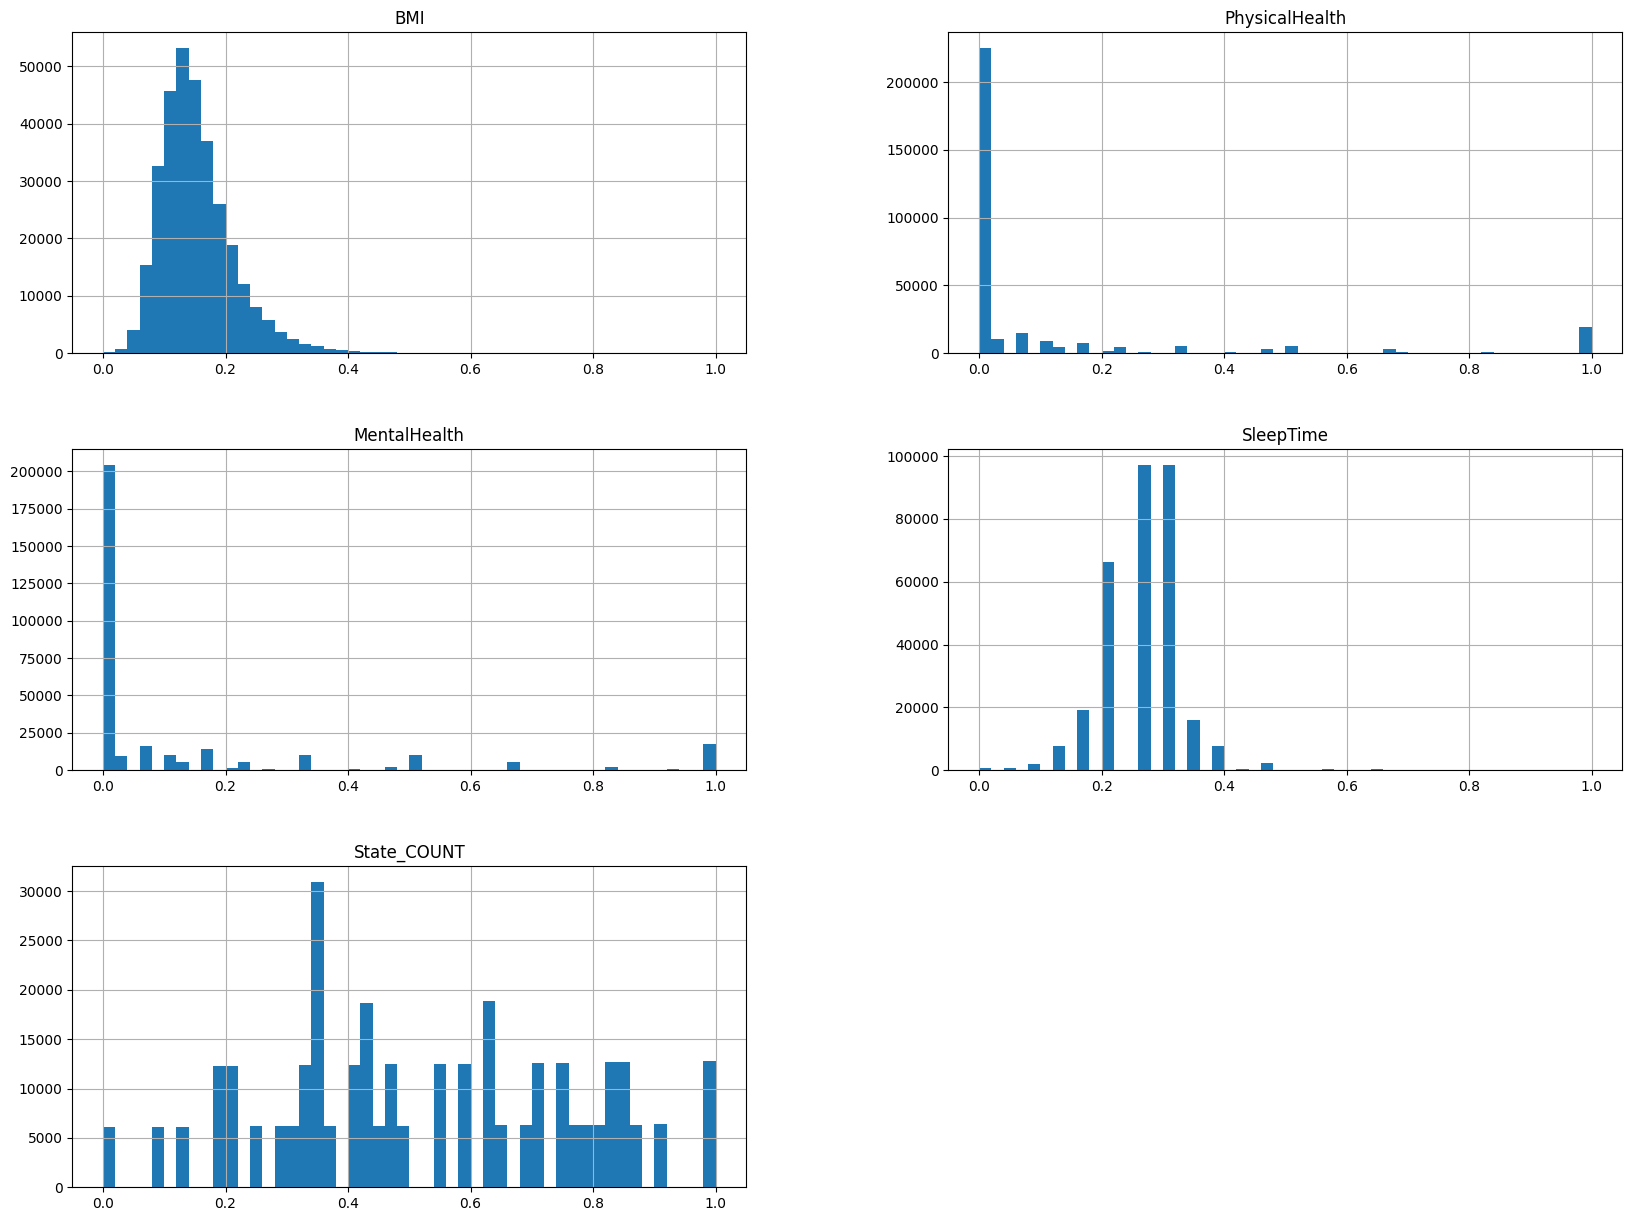

In [ ]:
# Univariate Analysis, checking out distribution float columns

df[num_columns].hist(bins=50, figsize=(20,15))

# Saving Graphic

plt.savefig('UnivariateAnalysis.png', format='png')
plt.show()

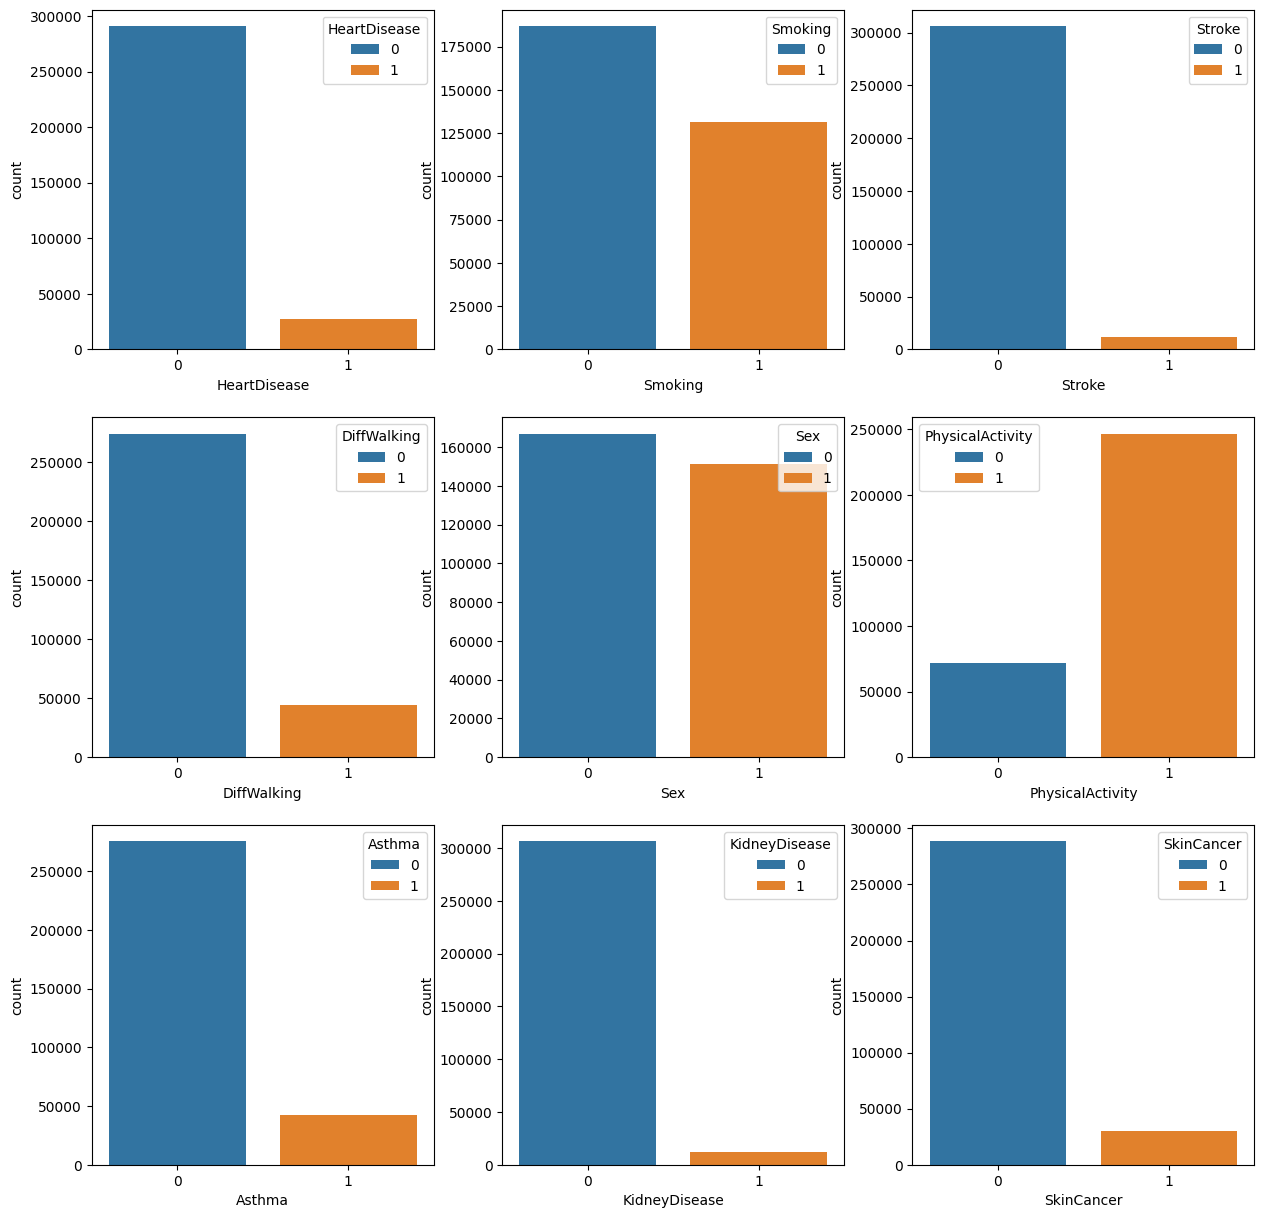

In [ ]:
# Distribution of binary columns

fig, ax = plt.subplots(3,3,figsize=(15, 15))
sns.countplot(x = 'HeartDisease', data = df,hue = 'HeartDisease', ax=ax[0,0])
sns.countplot(x = 'Smoking', data = df,hue = 'Smoking', ax=ax[0,1])
sns.countplot(x = 'Stroke', data = df,hue = 'Stroke', ax=ax[0,2])
sns.countplot(x = 'DiffWalking', data = df,hue = 'DiffWalking', ax=ax[1,0])
sns.countplot(x = 'Sex', data = df,hue = 'Sex', ax=ax[1,1])
sns.countplot(x = 'PhysicalActivity', data = df,hue = 'PhysicalActivity', ax=ax[1,2])
sns.countplot(x = 'Asthma', data = df,hue = 'Asthma', ax=ax[2,0])
sns.countplot(x = 'KidneyDisease', data = df,hue = 'KidneyDisease', ax=ax[2,1])
sns.countplot(x = 'SkinCancer', data = df,hue = 'SkinCancer', ax=ax[2,2])

# Saving Graphic

plt.savefig('Distribution1.png', format='png')

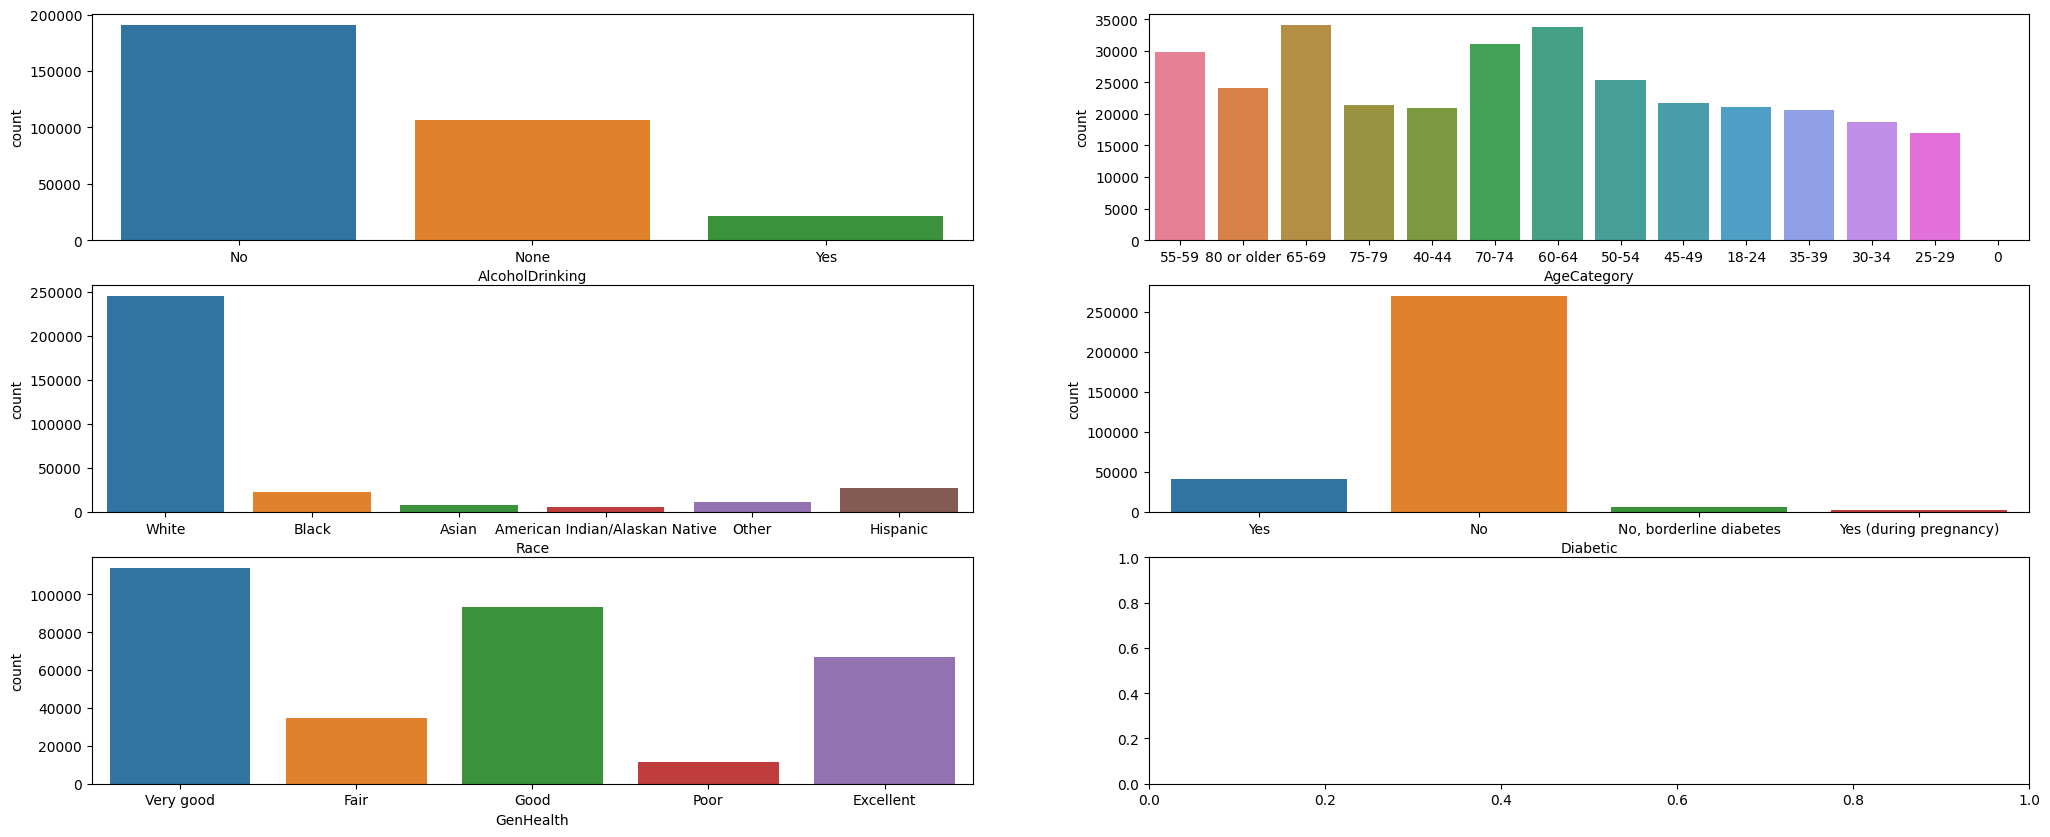

In [ ]:
# Distribution of non-binary columns, using original df to simplify

fig, ax = plt.subplots(3,2,figsize=(25, 10))
sns.countplot(x = 'AlcoholDrinking', data = df_original,hue = 'AlcoholDrinking', ax=ax[0,0])
sns.countplot(x = 'AgeCategory', data = df_original,hue = 'AgeCategory', ax=ax[0,1])
sns.countplot(x = 'Race', data = df_original,hue = 'Race', ax=ax[1,0])
sns.countplot(x = 'Diabetic', data = df_original,hue = 'Diabetic', ax=ax[1,1])
sns.countplot(x = 'GenHealth', data = df_original,hue = 'GenHealth', ax=ax[2,0])

# Saving Graphic

plt.savefig('Distribution2.png', format='png')

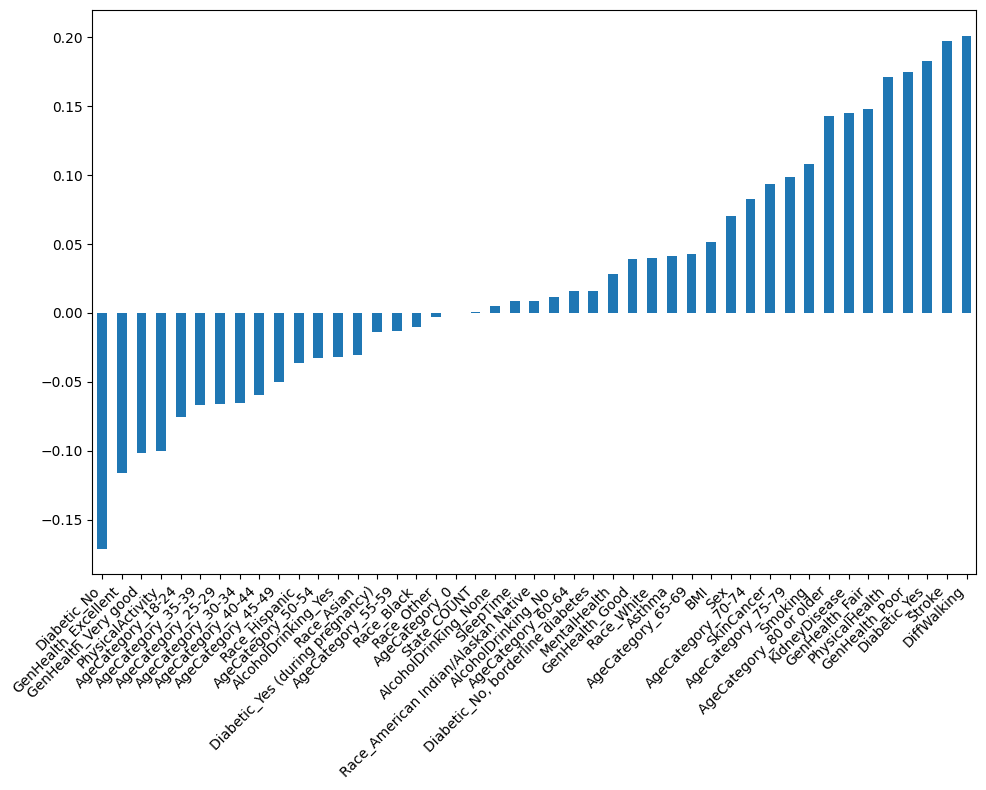

In [ ]:
# Find correlation between the variables

plt.figure(figsize=(10,8))
df.corr()['HeartDisease'][1:].sort_values().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)

# Saving Graphic

plt.tight_layout()
plt.savefig('Correlation.png', format='png')
plt.show()

In [ ]:
# Spearman's rank correlation coefficient
correlation_matrix_spearman = df.corr(method='spearman')
correlation_with_target_spearman = correlation_matrix_spearman['HeartDisease'].sort_values(ascending=False)
print(correlation_with_target_spearman)

HeartDisease                           1.000000
DiffWalking                            0.201087
Stroke                                 0.197056
Diabetic_Yes                           0.182957
GenHealth_Poor                         0.174888
GenHealth_Fair                         0.147811
KidneyDisease                          0.145322
PhysicalHealth                         0.143293
AgeCategory_80 or older                0.142670
Smoking                                0.107721
AgeCategory_75-79                      0.098824
SkinCancer                             0.093296
AgeCategory_70-74                      0.082524
Sex                                    0.070144
BMI                                    0.057418
AgeCategory_65-69                      0.042565
Asthma                                 0.041373
Race_White                             0.040102
GenHealth_Good                         0.038938
Diabetic_No, borderline diabetes       0.016170
AgeCategory_60-64                      0

# Insights

  Positive Correlations with Heart Disease:

* Difficulty Walking (DiffWalking): This variable shows the highest positive correlation (0.201087) with heart disease. Individuals who report difficulty walking are more likely to have heart disease, suggesting a link between reduced mobility and heart health.

* Stroke: The correlation of 0.197056 indicates that individuals who have had a stroke are significantly more likely to also have heart disease. This highlights the interrelationship between different cardiovascular conditions.

* Diabetes (Diabetic_Yes): With a correlation of 0.182957, diabetes is strongly associated with heart disease. This underscores the importance of managing diabetes to prevent cardiovascular complications.

* General Health (GenHealth_Poor and GenHealth_Fair): Poor (0.174888) and fair (0.147811) self-reported general health are both positively correlated with heart disease, indicating that individuals who perceive their health negatively are more likely to have heart disease.

* Kidney Disease: The correlation of 0.145322 with heart disease suggests that kidney disease is another significant comorbidity.

* Physical Health: Poor physical health (0.143293) is correlated with heart disease, emphasizing the role of overall physical well-being in cardiovascular health.

* Age: The elderly age categories (80 or older: 0.142670, 75-79: 0.098824, 70-74: 0.082524) show increasing correlations with heart disease, indicating age as a critical risk factor.

* Smoking: Smoking has a positive correlation (0.107721) with heart disease, highlighting the known risk associated with tobacco use.

* Skin Cancer: The correlation of 0.093296 suggests a possible link between skin cancer and heart disease, which may warrant further investigation.

* Sex: The correlation of 0.070144 indicates a slight gender difference in heart disease prevalence, potentially requiring gender-specific preventive measures.

  Negative Correlations with Heart Disease:

* Physical Activity: There is a negative correlation (-0.099937) between physical activity and heart disease, indicating that regular physical activity is protective against heart disease.

* General Health (GenHealth_Very good and GenHealth_Excellent): Very good (-0.101853) and excellent (-0.116012) self-reported general health are negatively correlated with heart disease, reinforcing the importance of maintaining good general health.

* Non-Diabetic Status (Diabetic_No): The strongest negative correlation (-0.170862) with heart disease, highlighting that individuals without diabetes are less likely to have heart disease.

  Minimal or No Correlation:

* Mental Health: The correlation is very low (-0.003509), indicating no significant relationship between mental health and heart disease in this dataset.

* Sleep Time: With a correlation of 0.007662, sleep time shows minimal association with heart disease, suggesting it might not be a primary factor in this context.

* Race: Various racial categories show low correlations, indicating that race might not be a strong determinant of heart disease in this dataset, except for slight variations among different racial groups.

  Key Takeaways:

* Comorbidities and General Health: Conditions such as difficulty walking, stroke, diabetes, kidney disease, and poor general health are strongly associated with heart disease. Managing these comorbidities and improving general health could be critical in reducing heart disease risk.

* Lifestyle Factors: Smoking and physical inactivity are significant modifiable risk factors. Public health interventions targeting these behaviors could help reduce the incidence of heart disease.

* Demographic Factors: Age and sex show varying levels of correlation with heart disease, indicating the need for targeted interventions for older adults and potential gender-specific strategies.

* Health Perception: Self-perception of health status is a valuable indicator of heart disease risk, with poorer perceived health correlating with higher risk.

These insights highlight the multifaceted nature of heart disease risk factors and the importance of a comprehensive approach to prevention and management, considering both medical conditions and lifestyle factors.


# Model Development and Evaluation:

Setting the Data

In [ ]:
# Slipt Dataset

df_x = df.drop('HeartDisease', axis=1)
df_y = df[['HeartDisease']]

In [ ]:
# Slipt Train and Test

x_train, x_test, y_train, y_test = model_selection.train_test_split(
                                        df_x, # X
                                        df_y, # y
                                        test_size = 0.20,
                                        random_state = 42
                                     )

Finding the best models

To compare these models, we have utilized Logistic Regression, Support Vector Machine (SVM), Decision Tree, Random Forest, Gradient Boosting, k-Nearest Neighbors (k-NN), and Naive Bayes classifiers. By scaling the data, we assessed the performance of each model. The accuracy of each model was recorded and plotted on a comparative bar chart, providing a clear visual representation of their predictive capabilities. This comprehensive analysis helps in identifying the most suitable model for accurate heart disease prediction based on various patient attributes and health indicators.

In [ ]:
# Logistic Regression

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
LGaccuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {LGaccuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.916518761681876


In [ ]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
DTaccuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {DTaccuracy}')

Decision Tree Accuracy: 0.8600845021753812


In [ ]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
RFaccuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {RFaccuracy}')

<ipython-input-32-11fca428d08d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Random Forest Accuracy: 0.9128276815304632


In [ ]:
# Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
GBaccuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {GBaccuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Accuracy: 0.9169114297830901


In [ ]:
# Support Vector Machine

svc = SVC(max_iter=2000)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
SVMaccuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {SVMaccuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Accuracy: 0.7942576216878445


In [ ]:
# k-Nearest Neighbors

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
KNCaccuracy = accuracy_score(y_test, y_pred)
print(f'k-NN Accuracy: {KNCaccuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k-NN Accuracy: 0.9067491793236685


In [ ]:
# Naive Bayes

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
NBaccuracy= accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {NBaccuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes Accuracy: 0.7088601630357956


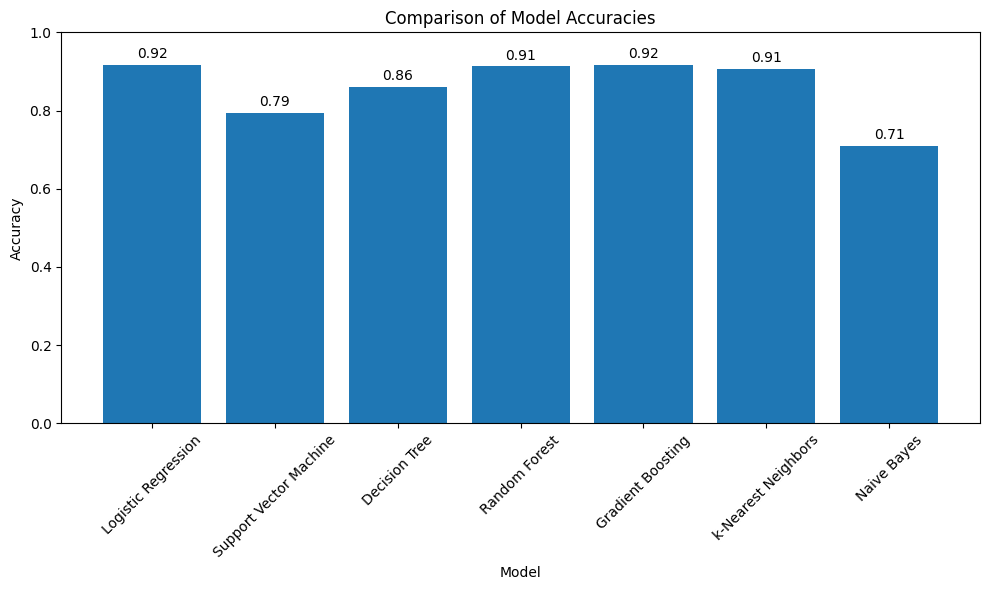

In [ ]:
# Plot Comparison of Model Accuracies

accuracies = {
    'Logistic Regression': LGaccuracy,
    'Support Vector Machine': SVMaccuracy,
    'Decision Tree': DTaccuracy,
    'Random Forest': RFaccuracy,
    'Gradient Boosting': GBaccuracy,
    'k-Nearest Neighbors': KNCaccuracy,
    'Naive Bayes': NBaccuracy
}

# Plor Bar Chart

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.ylim(0, 1)

for i, (model, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

# Saving Graphic

plt.tight_layout()
plt.savefig('ComparisonACC.png', format='png')
plt.show()

As a result, we can see that four models stand out from the others, with small differences in the final results. Here they are:

* Logistic Regression
* Random Forest
* Gradient Boosting
* K-Nearest Neighbors

I will delve deeper into these models to achieve the best possible results. The selection of the optimal model will be guided by an analysis of the ROC Curve and the confusion matrix.

The primary reason for using a ROC curve is that it provides a comprehensive view of the model's performance across different classification thresholds, rather than relying on a single threshold value. This helps in understanding the trade-offs between sensitivity and specificity, and allows for the selection of the optimal threshold based on the specific requirements of the problem. Additionally, the Area Under the Curve (AUC) score derived from the ROC curve serves as a single metric to compare the performance of different models, with a higher AUC indicating better overall performance.

In conjunction with the ROC curve, the confusion matrix will be utilized to provide a detailed breakdown of the model's predictions. The confusion matrix allows for the evaluation of the model's accuracy by presenting the counts of true positives, true negatives, false positives, and false negatives. This detailed insight helps in identifying specific areas where the model performs well and where it may need improvement, offering a clearer picture of its classification capabilities. By combining the insights from both the ROC curve and the confusion matrix, a more comprehensive evaluation of each model's performance can be achieved, leading to a more informed selection of the optimal model.





1. Logistic Regression

In [ ]:
# Find the best C

max_reg = None
max_score = 0
best_C = None

for i in range(-4, 5):
    C_value = 10 ** i
    log_reg = LogisticRegression(C=C_value, max_iter=2000, random_state=42)
    log_reg.fit(x_train, y_train)
    train_accuracy = log_reg.score(x_train, y_train)
    test_accuracy = log_reg.score(x_test, y_test)
    print('Logistic Regression C: {}. Train: {} - Test: {}'.format(C_value, train_accuracy, test_accuracy))
    if test_accuracy > max_score:
        max_score = test_accuracy
        max_reg = train_accuracy
        best_C = C_value

print("Best C value for Logistic Regression: ", best_C)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression C: 0.0001. Train: 0.914296260229004 - Test: 0.914602541347951


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression C: 0.001. Train: 0.9155920649630107 - Test: 0.9165972953021189


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression C: 0.01. Train: 0.9158198124617148 - Test: 0.9167543625426045


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression C: 0.1. Train: 0.9157569855655207 - Test: 0.9165501751299732


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression C: 1. Train: 0.9157334254794478 - Test: 0.916518761681876


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression C: 10. Train: 0.9157255721174234 - Test: 0.916518761681876


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression C: 100. Train: 0.9157294987984356 - Test: 0.9165344684059246


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression C: 1000. Train: 0.9157294987984356 - Test: 0.9165344684059246


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression C: 10000. Train: 0.9157255721174234 - Test: 0.916518761681876
Best C value for Logistic Regression:  0.01


In [ ]:
# Setting Model

log_reg = LogisticRegression(C=best_C, max_iter=2000, random_state=42)
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, max_iter=2000, random_state=42)

In [ ]:
# Prediction

lr_pred = log_reg.predict(x_test)
accuracy_score_LR = round(accuracy_score(y_test, lr_pred),4)

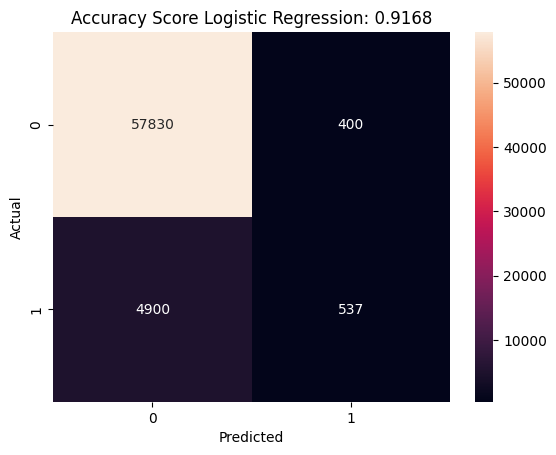

In [ ]:
# Plot Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Accuracy Score Logistic Regression: {}'.format(accuracy_score_LR))
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Saving Graphic

plt.savefig('confLR.png', format='png')
plt.show()

2. Random Forest Classifier

In [ ]:
# Find the best max_depht

max_reg = None
max_score = 0
best_max_depth = None
t=()

for i in range(1, 20):
    dt = RandomForestClassifier(max_depth=i, random_state=42)
    dt.fit(x_train, y_train.values.ravel())
    train_accuracy = dt.score(x_train, y_train)
    test_accuracy = dt.score(x_test, y_test)
    print ('Tree max_depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))
    if test_accuracy > max_score :
      max_score = test_accuracy
      max_reg = train_accuracy

      best_max_depht_RFC = (i)
print ("Best max_depht: ",best_max_depht_RFC)

Tree max_depth: 1. Train: 0.914296260229004 - Test: 0.914602541347951
Tree max_depth: 2. Train: 0.914296260229004 - Test: 0.914602541347951
Tree max_depth: 3. Train: 0.914296260229004 - Test: 0.914602541347951
Tree max_depth: 4. Train: 0.914296260229004 - Test: 0.914602541347951
Tree max_depth: 5. Train: 0.9144651075125261 - Test: 0.9147281951403395
Tree max_depth: 6. Train: 0.9147556819074246 - Test: 0.9149323825529709
Tree max_depth: 7. Train: 0.9150619630263715 - Test: 0.9151522766896508
Tree max_depth: 8. Train: 0.915631331773132 - Test: 0.9154978246187193
Tree max_depth: 9. Train: 0.9161378736236983 - Test: 0.915434997722525
Tree max_depth: 10. Train: 0.9172609043931708 - Test: 0.9154035842744279
Tree max_depth: 11. Train: 0.9187177030486752 - Test: 0.9158276658237391
Tree max_depth: 12. Train: 0.9205357563572966 - Test: 0.9158276658237391
Tree max_depth: 13. Train: 0.9226286773367679 - Test: 0.9160475599604191
Tree max_depth: 14. Train: 0.9250867796503683 - Test: 0.91578054565159

In [ ]:
# Defining Model

rf = RandomForestClassifier(n_estimators=100, max_depth=best_max_depht_RFC, random_state=42)
rf.fit(X=x_train,y=np.ravel(y_train))

RandomForestClassifier(max_depth=16, random_state=42)

In [ ]:
# Prediction

rf_pred = rf.predict(x_test)
accuracy_score_RF = round(accuracy_score(y_test, rf_pred),4)

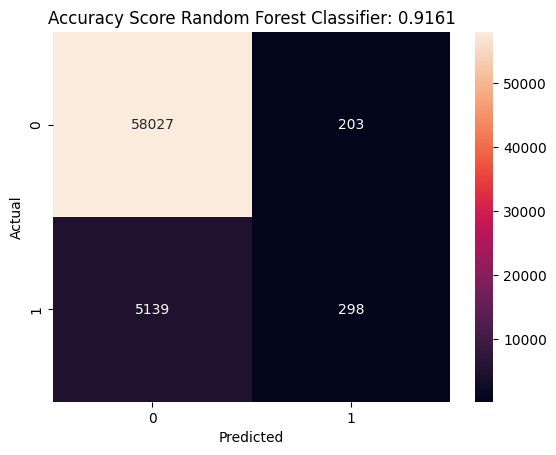

In [ ]:
# Plot Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, rf_pred), annot=True, fmt='d')
plt.title('Accuracy Score Random Forest Classifier: {}'.format(accuracy_score_RF))
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Saving Graphic

plt.savefig('confRF.png', format='png')
plt.show()

3. Gradient Boosting Classifier

In [ ]:
# Find the best max_depht

max_reg = None
max_score = 0
best_max_depth = None
t=()

for i in range(1, 8):
    dt = GradientBoostingClassifier(max_depth=i, random_state=42)
    dt.fit(x_train, y_train.values.ravel())
    train_accuracy = dt.score(x_train, y_train)
    test_accuracy = dt.score(x_test, y_test)
    print ('Tree max_depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))
    if test_accuracy > max_score :
      max_score = test_accuracy
      max_reg = train_accuracy

      best_max_depht_GBC = (i)
print ("Best max_depht: ",best_max_depht_GBC)

Tree max_depth: 1. Train: 0.9156038450060471 - Test: 0.9158276658237391
Tree max_depth: 2. Train: 0.9158590792718363 - Test: 0.916628708750216
Tree max_depth: 3. Train: 0.9161221668996498 - Test: 0.9169114297830901
Tree max_depth: 4. Train: 0.9167308024565316 - Test: 0.9170842037476243
Tree max_depth: 5. Train: 0.9178773933120769 - Test: 0.9167857759907017
Tree max_depth: 6. Train: 0.9195030392511034 - Test: 0.9159376128920791
Tree max_depth: 7. Train: 0.9228721315595206 - Test: 0.9154664111706221
Best max_depht:  4


In [ ]:
# Defining Model

gb = GradientBoostingClassifier(n_estimators=100, max_depth=best_max_depht_GBC, min_samples_split=500, random_state=42)
gb.fit(x_train, np.ravel(y_train))

GradientBoostingClassifier(max_depth=4, min_samples_split=500, random_state=42)

In [ ]:
# Prediction

gb_pred = gb.predict(x_test)
accuracy_score_GB = round(accuracy_score(y_test, gb_pred),4)

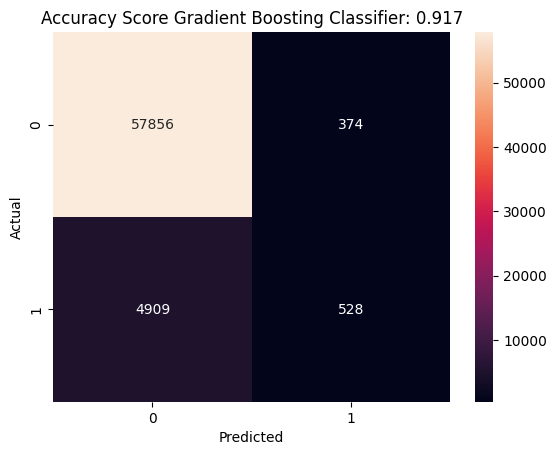

In [ ]:
# Plot Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, gb_pred), annot=True, fmt='d')
plt.title('Accuracy Score Gradient Boosting Classifier: {}'.format(accuracy_score_GB))
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Saving Graphic

plt.savefig('confGB.png', format='png')
plt.show()

4. K-Nearest Neighbors

In [ ]:
# Find the best n_neighbors

max_reg = None
max_score = 0
best_n_neighbors = None

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.values.ravel())
    train_accuracy = knn.score(x_train, y_train)
    test_accuracy = knn.score(x_test, y_test)
    print('KNN n_neighbors: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))
    if test_accuracy > max_score:
        max_score = test_accuracy
        max_reg = train_accuracy
        best_n_neighbors = i

print("Best n_neighbors for KNN: ", best_n_neighbors)

KNN n_neighbors: 1. Train: 0.9999528798278543 - Test: 0.8713148098701053
KNN n_neighbors: 2. Train: 0.9339924921859047 - Test: 0.9087125198297391
KNN n_neighbors: 3. Train: 0.9345972010617746 - Test: 0.8989900576436772
KNN n_neighbors: 4. Train: 0.9250435861592348 - Test: 0.9104873796472269
KNN n_neighbors: 5. Train: 0.925522641242716 - Test: 0.9067491793236685
KNN n_neighbors: 6. Train: 0.9213525060078219 - Test: 0.9124193067052006
KNN n_neighbors: 7. Train: 0.921965068245716 - Test: 0.9104559661991298
KNN n_neighbors: 8. Train: 0.9194873325270548 - Test: 0.9135973110088429
KNN n_neighbors: 9. Train: 0.920103821445961 - Test: 0.9124978403254433
KNN n_neighbors: 10. Train: 0.9185645624892016 - Test: 0.9138329118695714
KNN n_neighbors: 11. Train: 0.9192320982612656 - Test: 0.9131104025633374
KNN n_neighbors: 12. Train: 0.918018753828514 - Test: 0.9141627530745913
KNN n_neighbors: 13. Train: 0.9185606358081895 - Test: 0.9135344841126486
KNN n_neighbors: 14. Train: 0.9175985989602149 - Te

In [ ]:
# Defining Model

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(x_train, np.ravel(y_train))

In [ ]:
# Prediction

knn_pred = knn.predict(x_test)
accuracy_score_KNN = round(accuracy_score(y_test, knn_pred),4)

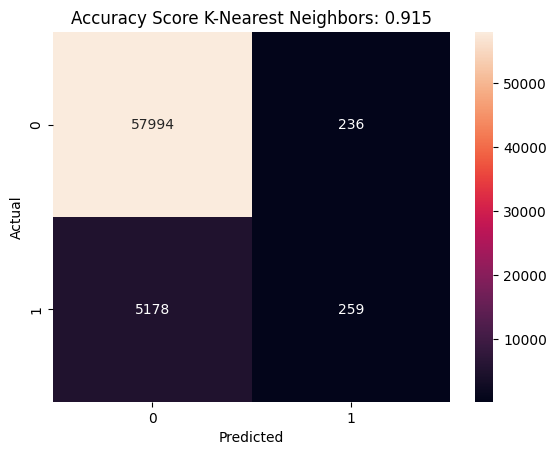

In [ ]:
# Plot Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, knn_pred), annot=True, fmt='d')
plt.title('Accuracy Score K-Nearest Neighbors: {}'.format(accuracy_score_KNN))
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Saving Graphic

plt.savefig('confKNN.png', format='png')
plt.show()

# Model Interpretation and Insights

FINAL MODEL COMPARISON

In [ ]:
RANDOM_STATE = 42
n_estimators = 100
max_iter=2000

models = [
    ('LogisticRegressor', LogisticRegression(C=best_C, random_state=RANDOM_STATE, max_iter=max_iter)),
    ('RandomForest', RandomForestClassifier(n_estimators=n_estimators, max_depth=best_max_depht_RFC, random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=n_estimators, max_depth=best_max_depht_GBC, random_state=RANDOM_STATE)),
    ('KNeighbors', KNeighborsClassifier(n_neighbors=best_n_neighbors, algorithm= 'auto',p=1))
]

In [ ]:
# Final ROC Curce

plt.clf()
for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(x_train, np.ravel(y_train))
    predictions = model_instance.predict_proba(x_test)[:,1]
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')

# Saving Graphic

plt.savefig('finalroc.png', format='png')
plt.show()

Insights:

Based on the analysis of the ROC AUC scores for the different models, we can draw several insights about their performance in predicting heart disease:

* Gradient Boosting: This model achieved the highest ROC AUC score of 0.8433, indicating it has the best overall performance in distinguishing between positive and negative cases of heart disease. This suggests that Gradient Boosting is the most effective model for our dataset.

* Logistic Regression: With a ROC AUC score of 0.8409, Logistic Regression also performed very well, closely following Gradient Boosting. This model is relatively simple and interpretable, making it a strong contender for practical applications.

* Random Forest: The Random Forest model achieved a ROC AUC score of 0.8377, slightly lower than Gradient Boosting and Logistic Regression, but still demonstrating good predictive capability. Random Forests are known for their robustness and ability to handle complex data structures, making this result promising.

* K-Nearest Neighbors (KNN): The KNN model obtained a ROC AUC score of 0.7893, which is significantly lower than the other models. This indicates that KNN is less effective in this context, potentially due to its sensitivity to the choice of neighbors and its computational intensity with large datasets.

In conclusion, while all models show decent performance, Gradient Boosting and Logistic Regression stand out as the top performers.

# Export Report

In [ ]:
# Reading the graphs and converting to base64

with open('ComparisonACC.png', 'rb') as f:
    ComparisonACC = base64.b64encode(f.read()).decode('utf-8')

with open('Correlation.png', 'rb') as f:
    Correlation = base64.b64encode(f.read()).decode('utf-8')

with open('Distribution1.png', 'rb') as f:
    Distribution1 = base64.b64encode(f.read()).decode('utf-8')

with open('Distribution2.png', 'rb') as f:
    Distribution2 = base64.b64encode(f.read()).decode('utf-8')

with open('UnivariateAnalysis.png', 'rb') as f:
    UnivariateAnalysis = base64.b64encode(f.read()).decode('utf-8')

with open('confGB.png', 'rb') as f:
    confGB = base64.b64encode(f.read()).decode('utf-8')

with open('confLR.png', 'rb') as f:
    confLR = base64.b64encode(f.read()).decode('utf-8')

with open('confRF.png', 'rb') as f:
    confRF = base64.b64encode(f.read()).decode('utf-8')

with open('confKNN.png', 'rb') as f:
    confKNN = base64.b64encode(f.read()).decode('utf-8')

with open('finalroc.png', 'rb') as f:
    finalroc = base64.b64encode(f.read()).decode('utf-8')

# Inserting the encoded graphics to HTML
html_string = f'''
<!doctype html>
<html>
<head>
    <meta charset="UTF-8">
    <title>Report Heart Disease ML</title>
    <style>
        body {{
            margin: 0 auto;
            background: whitesmoke;
            text-align: center; /* Alinha o texto e os gráficos no centro */
        }}
        img {{
            display: block;
            margin: 20px auto; /* Adiciona margem ao redor dos gráficos */
        }}
    </style>
</head>

<body>
    <h1>Report Heart Disease ML</h1>

    <!-- *** Exploratory Data Analysis *** -->
    <h1>Exploratory Data Analysis</h1>

    <h2>Univariate Analysis</h2>
    <img src="data:image/png;base64,{UnivariateAnalysis}" alt="Univariate Analysis">
    <p></p>

    <h2>Distribution of Binary Columns</h2>
    <img src="data:image/png;base64,{Distribution1}" alt="Decision Tree">

    <h2>Distribution of Non-Binary Columns</h2>
    <img src="data:image/png;base64,{Distribution2}" alt="Outro Gráfico">

    <h2>Correlation Between the Variables</h2>
    <img src="data:image/png;base64,{Correlation}" alt="Outro Gráfico">
    <p>These insights highlight the multifaceted nature of heart disease risk factors and the importance of a comprehensive approach to prevention and management, considering both medical conditions and lifestyle factors.</p>

    <!-- *** Model Development and Evaluation *** -->
    <h1>Model Development and Evaluation</h1>

    <h2>Accuracy Comparison</h2>
    <img src="data:image/png;base64,{ComparisonACC}" alt="Univariate Analysis">
    <p>As a result, we can see that four models stand out from the others, with small differences in the final results. Here they are:<p>
    <p> - Logistic Regression<p>
    <p> - Random Forest<p>
    <p> - Gradient Boosting<p>
    <p> - K Nearest Neighbors<p>

    <h2>Confusion Matrix Logistic Regression</h2>
    <img src="data:image/png;base64,{confLR}" alt="Univariate Analysis">
    <p></p>

    <h2>Confusion Matrix Random Forest</h2>
    <img src="data:image/png;base64,{confRF}" alt="Univariate Analysis">
    <p></p>

    <h2>Confusion Matrix Gradient Booster</h2>
    <img src="data:image/png;base64,{confGB}" alt="Univariate Analysis">
    <p></p>

    <h2>Confusion Matrix K-Nearest Neighbors</h2>
    <img src="data:image/png;base64,{confKNN}" alt="Univariate Analysis">
    <p></p>

    <h2>ROC Curve</h2>
    <img src="data:image/png;base64,{finalroc}" alt="Univariate Analysis">
    <p></p>

    <!-- *** Mais Comentários *** -->
    <h2>Final Results</h2>

    <p>Insights:<p>

<p>Based on the analysis of the ROC AUC scores for the different models, we can draw several insights about their performance in predicting heart disease:<p>

<p>Gradient Boosting: This model achieved the highest ROC AUC score of 0.8433, indicating it has the best overall performance in distinguishing between positive and negative cases of heart disease. This suggests that Gradient Boosting is the most effective model for our dataset.<p>

<p>Logistic Regression: With a ROC AUC score of 0.8409, Logistic Regression also performed very well, closely following Gradient Boosting. This model is relatively simple and interpretable, making it a strong contender for practical applications.<p>

<p>Random Forest: The Random Forest model achieved a ROC AUC score of 0.8377, slightly lower than Gradient Boosting and Logistic Regression, but still demonstrating good predictive capability. Random Forests are known for their robustness and ability to handle complex data structures, making this result promising.<p>

<p>K-Nearest Neighbors (KNN): The KNN model obtained a ROC AUC score of 0.7893, which is significantly lower than the other models. This indicates that KNN is less effective in this context, potentially due to its sensitivity to the choice of neighbors and its computational intensity with large datasets.<p>

<p>In conclusion, while all models show decent performance, Gradient Boosting and Logistic Regression stand out as the top performers.</p>
</body>
</html>'''

# Escrevendo o HTML para um arquivo
with open('Report_Heart_Disease.html', 'w', encoding='utf-8') as f:
    f.write(html_string)